In [1]:
#!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import prince
import pandas as pd

### Import the HR data set 

In [3]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'

In [7]:
data = pd.read_csv(data_url)
data

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,48,52.25,MA,2056,Male,Single,US Citizen,No,Asian,289,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,36,51.00,MA,1887,Male,Single,US Citizen,No,Asian,284,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,34,46.00,MA,2045,Male,Single,US Citizen,No,White,284,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,30,45.00,MA,2134,Male,Married,US Citizen,No,White,220,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


In [63]:
data.columns

Index(['Age', 'Pay Rate', 'State', 'Zip', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic/Latino', 'RaceDesc', 'Days Employed', 'Reason For Term',
       'Employment Status', 'Department', 'Position', 'Manager Name',
       'Employee Source', 'Performance Score'],
      dtype='object')

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [67]:
data = data.astype({'Zip':'object'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    object 
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

### Pull out the categorical variables and note the dimensions of the data set.

In [68]:
df = data.select_dtypes(include=['object'])
df.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [69]:
mca = prince.MCA(n_components=2)
mca = mca.fit(df)

### Plot the coordinates of each resulting dimension.

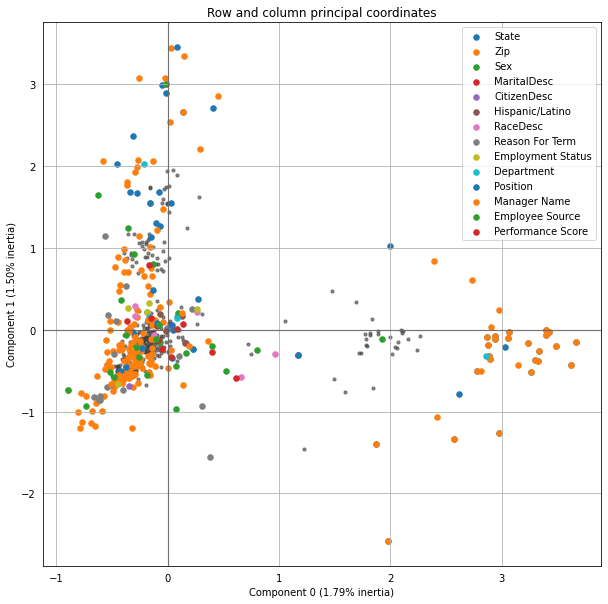

In [70]:
ax = mca.plot_coordinates(
    X=df,
    ax=None,
    figsize=(10,10),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

In [71]:
mca.explained_inertia_

[0.01790483633031173, 0.015017018759038351]

### One hot encode the categorical features and note the change in dimensions in the data set.

In [72]:
from sklearn.preprocessing import OneHotEncoder as OHE
ohe = OHE()
coded = ohe.fit_transform(df).toarray()

In [73]:
coded.shape

(310, 313)

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [74]:
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=None
)
ca = ca.fit(coded)

### Plot the coordinates of each resulting dimension.

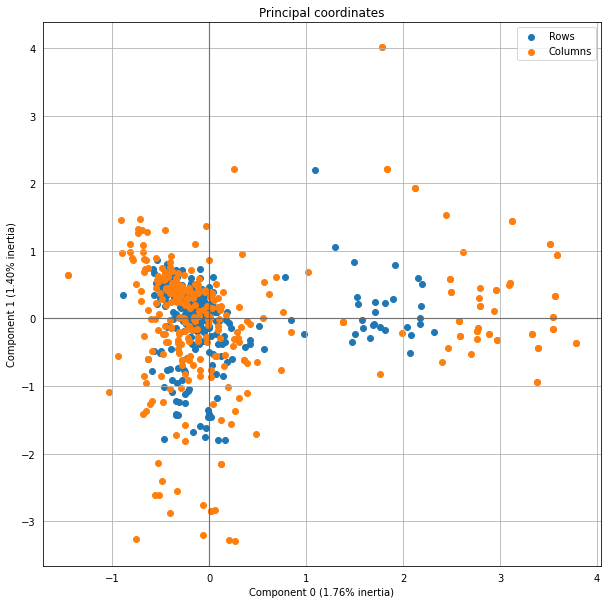

In [75]:
ax2 = ca.plot_coordinates(
    X=coded,
    ax=None,
    figsize=(10,10),
    x_component=0,
    y_component=1,
    show_row_labels=False,
    show_col_labels=False
)

In [76]:
ca.explained_inertia_

[0.01756976921206665, 0.014031463191279594]

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [77]:
famd = prince.FAMD(n_components=2)
famd = famd.fit(data)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

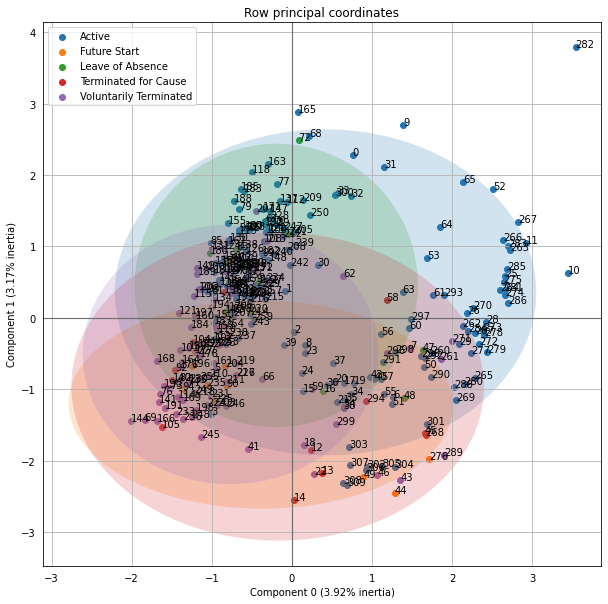

In [78]:
ax1 = famd.plot_row_coordinates(
    data,
    ax=None,
    figsize=(10,10),
    x_component=0,
    y_component=1,
    labels=data.index,
    color_labels=data['Employment Status'],
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True,
)

In [79]:
famd.explained_inertia_

array([0.03920019, 0.03170587])